<a href="https://colab.research.google.com/github/sanskriti111-j/Data-Analysis/blob/main/handling_missing_values_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random imputation

select randomly any data from column and replace missing value.::



used for both numerical and categorical data

data shape does not change
good for linear algorithms

memory heavy data for deployment


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Sales Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,Male,34.0,Beauty,3.0,50.0,150.0
1,1,Female,26.0,Clothing,2.0,500.0,1000.0
2,2,Male,50.0,Electronics,1.0,30.0,30.0
3,3,Male,37.0,NaN,1.0,500.0,500.0
4,4,Male,30.0,NaN,2.0,50.0,100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Gender            731 non-null    object 
 2   Age               949 non-null    float64
 3   Product Category  765 non-null    object 
 4   Quantity          875 non-null    float64
 5   Price per Unit    847 non-null    float64
 6   Total Amount      783 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [ ]:
df.isnull().mean()

,0
Unnamed: 0,0.000
Gender,0.269
Age,0.051
Product Category,0.235
Quantity,0.125
Price per Unit,0.153
Total Amount,0.217


In [ ]:
x=df.drop(columns=['Total Amount'])
y=df['Total Amount']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [ ]:
x_train.head()

,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Age_imputed
175,175,Female,43.0,Beauty,2.0,50.0,43.0
818,818,Female,35.0,Beauty,2.0,50.0,35.0
677,677,Female,60.0,Electronics,3.0,300.0,60.0
952,952,Male,45.0,Beauty,3.0,30.0,45.0
200,200,NaN,56.0,Electronics,1.0,25.0,56.0


In [ ]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

<ipython-input-15-7b24c7d8349f>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
<ipython-input-15-7b24c7d8349f>:1: 

In [ ]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

<ipython-input-16-0cf488d0810a>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values
<ipython-input-16-0cf488d0810a>:1: Sett

In [ ]:
x_train

,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Age_imputed
175,175,Female,43.0,Beauty,2.0,50.0,43.000000
818,818,Female,35.0,Beauty,2.0,50.0,35.000000
677,677,Female,60.0,Electronics,3.0,300.0,60.000000
952,952,Male,45.0,Beauty,3.0,30.0,45.000000
200,200,NaN,56.0,Electronics,1.0,25.0,56.000000
...,...,...,...,...,...,...,...
534,534,NaN,47.0,Beauty,3.0,30.0,47.000000
584,584,Female,24.0,Clothing,1.0,25.0,24.000000
493,493,Female,42.0,Beauty,4.0,50.0,42.000000
527,527,NaN,36.0,Clothing,2.0,30.0,36.000000


in above we can see that there are some missing values in age column but in age_imputed column there are no missing values they have been replaced by random imputer.

<ipython-input-18-0bddf0e4f9dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='original',hist=False)
<ipython-input-18-0bddf0e4f9dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label='imputed',hist=False)


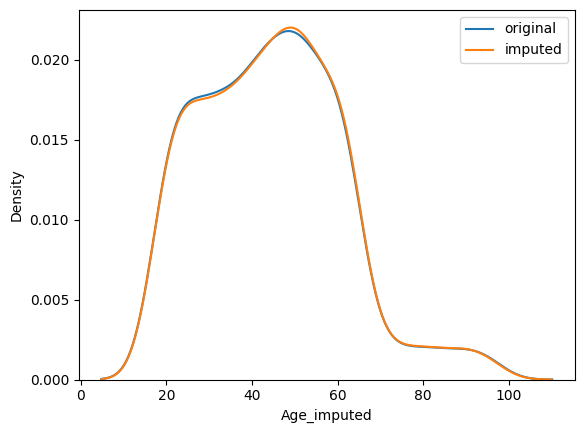

In [ ]:
sns.distplot(x_train['Age'],label='original',hist=False)
sns.distplot(x_train['Age_imputed'],label='imputed',hist=False)
plt.legend()
plt.show()

In [ ]:
print('original age variance',x_train['Age'].var())
print('imputed age variance', x_train['Age_imputed'].var())

original age variance 274.4970130309924
imputed age variance 273.87368416409026


In [ ]:
x_train[['Age','Age_imputed','Quantity','Price per Unit']].cov()

,Age,Age_imputed,Quantity,Price per Unit
Age,274.497013,274.497013,0.089155,199.852394
Age_imputed,274.497013,273.873684,-0.049264,183.155573
Quantity,0.089155,-0.049264,1.276097,3.272868
Price per Unit,199.852394,183.155573,3.272868,36486.517660


<Axes: >

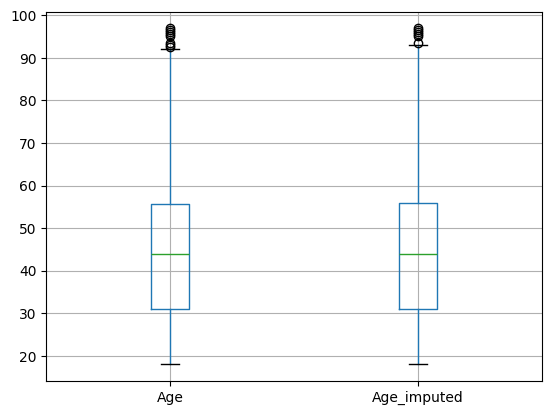

In [ ]:
x_train[['Age','Age_imputed']].boxplot()

The code fills missing values in 'Age' by randomly sampling from valid ages, using the corresponding 'Quantity' value as a seed — ensuring the imputation is both realistic and reproducible.

In [ ]:
def impute_age_with_random_state(row):
    if pd.isnull(row['Age']):
        # Sample a value from non-null ages using 'Quantity' as random state
        if not pd.isnull(row['Quantity']):
            sampled_value = x_train['Age'].dropna().sample(1, random_state=int(row['Quantity'])).values[0]
            return sampled_value
        else:
            # Handle cases where Quantity is also missing, e.g., impute with mean or median
            return x_train['Age'].mean() # Or .median() or another strategy
    else:
        return row['Age']

# Apply the imputation function to the 'Age_imputed' column
x_train['Age_imputed'] = x_train.apply(impute_age_with_random_state, axis=1)
x_test['Age_imputed'] = x_test.apply(impute_age_with_random_state, axis=1)

# Categorical data

In [ ]:
df.isnull().mean()

,0
Unnamed: 0,0.000
Gender,0.269
Age,0.051
Product Category,0.235
Quantity,0.125
Price per Unit,0.153
Total Amount,0.217


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Gender            731 non-null    object 
 2   Age               949 non-null    float64
 3   Product Category  765 non-null    object 
 4   Quantity          875 non-null    float64
 5   Price per Unit    847 non-null    float64
 6   Total Amount      783 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [ ]:
x_train['Gender_imputed']=x_train['Gender']
x_train['Product Category_imputed']=x_train['Product Category']
x_test['Gender_imputed']=x_test['Gender']
x_test['Product Category_imputed']=x_test['Product Category']


In [ ]:
x_train

,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Age_imputed,Gender_imputed,Product Category_imputed
175,175,Female,43.0,Beauty,2.0,50.0,43.0,Female,Beauty
818,818,Female,35.0,Beauty,2.0,50.0,35.0,Female,Beauty
677,677,Female,60.0,Electronics,3.0,300.0,60.0,Female,Electronics
952,952,Male,45.0,Beauty,3.0,30.0,45.0,Male,Beauty
200,200,NaN,56.0,Electronics,1.0,25.0,56.0,NaN,Electronics
...,...,...,...,...,...,...,...,...,...
534,534,NaN,47.0,Beauty,3.0,30.0,47.0,NaN,Beauty
584,584,Female,24.0,Clothing,1.0,25.0,24.0,Female,Clothing
493,493,Female,42.0,Beauty,4.0,50.0,42.0,Female,Beauty
527,527,NaN,36.0,Clothing,2.0,30.0,36.0,NaN,Clothing


In [ ]:
x_train['Gender_imputed'][x_train['Gender_imputed'].isnull()]=x_train['Gender'].dropna().sample(x_train['Gender'].isnull().sum()).values


In [ ]:
x_test['Gender_imputed'][x_test['Gender_imputed'].isnull()]=x_test['Gender'].dropna().sample(x_test['Gender'].isnull().sum()).values


<ipython-input-37-62efd7bfdd8d>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Gender_imputed'][x_test['Gender_imputed'].isnull()]=x_test['Gender'].dropna().sample(x_test['Gender'].isnull().sum()).values
<ipython-input-37-62efd7bfd

In [ ]:
# Ensure the imputed column exists in x_test
if 'Product Category_imputed' not in x_test.columns:
    x_test['Product Category_imputed'] = x_test['Product Category']

x_train.loc[x_train['Product Category_imputed'].isnull(), 'Product Category_imputed'] = x_train['Product Category'].dropna().sample(x_train['Product Category'].isnull().sum(), replace=True).values
x_test.loc[x_test['Product Category_imputed'].isnull(), 'Product Category_imputed'] = x_test['Product Category'].dropna().sample(x_test['Product Category'].isnull().sum(), replace=True).values

In [ ]:
temp=pd.concat([
    x_train['Gender'].value_counts()/len(x_train['Gender'].dropna()),
    x_train['Gender_imputed'].value_counts()/len(x_train)
], axis=1)
temp.columns={'original','imputed'}

In [ ]:
temp

,imputed,original
Female,0.508532,0.3725
Male,0.491468,0.3600


In [ ]:
temp=pd.concat([
    x_train['Product Category'].value_counts()/len(x_train['Product Category'].dropna()),
    x_train['Product Category_imputed'].value_counts()/len(x_train)
], axis=1)
temp.columns={'original','imputed'}

In [ ]:
temp

,imputed,original
Clothing,0.355155,0.3600
Electronics,0.328969,0.3325
Beauty,0.315876,0.3075


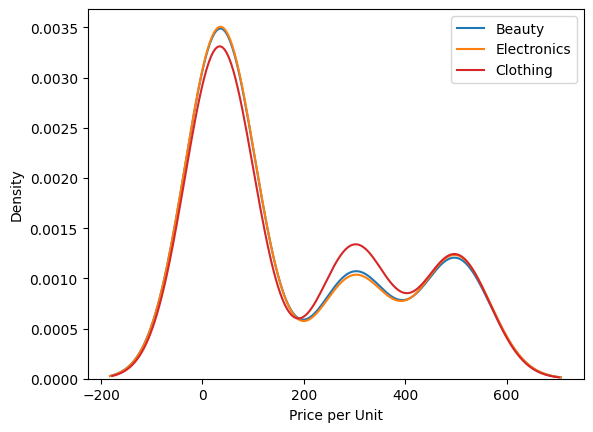

In [ ]:
for category in x_train['Product Category'].unique():
    sns.distplot(x_train.loc[x_train['Product Category']==category,'Price per Unit'],label=category,hist=False)
plt.legend()
plt.show()

<ipython-input-58-897a90f9a288>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x_train['Product Category_imputed']==category,'Price per Unit'],label=category,hist=False)
<ipython-input-58-897a90f9a288>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x

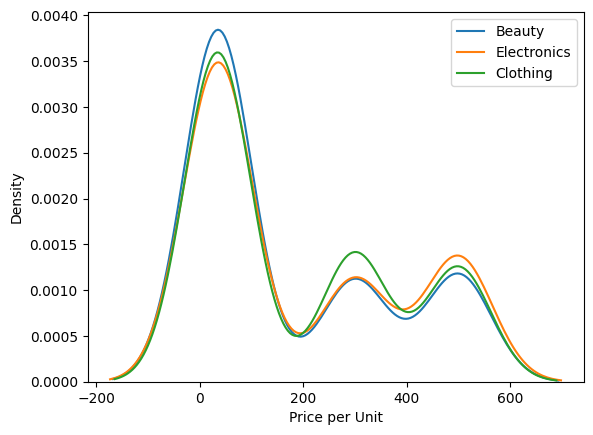

In [ ]:
for category in x_train['Product Category_imputed'].unique():
    sns.distplot(x_train.loc[x_train['Product Category_imputed']==category,'Price per Unit'],label=category,hist=False)
plt.legend()
plt.show()

<ipython-input-59-59360c248fef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x_train['Gender']==category,'Price per Unit'],label=category,hist=False)
<ipython-input-59-59360c248fef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x_train['Gender']==

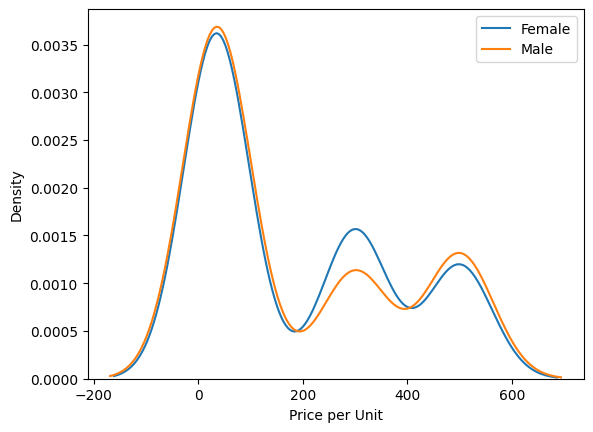

In [ ]:
for category in x_train['Gender'].unique():
    sns.distplot(x_train.loc[x_train['Gender']==category,'Price per Unit'],label=category,hist=False)
plt.legend()
plt.show()

<ipython-input-60-2ab124030947>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x_train['Gender_imputed']==category,'Price per Unit'],label=category,hist=False)
<ipython-input-60-2ab124030947>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.loc[x_train['Ge

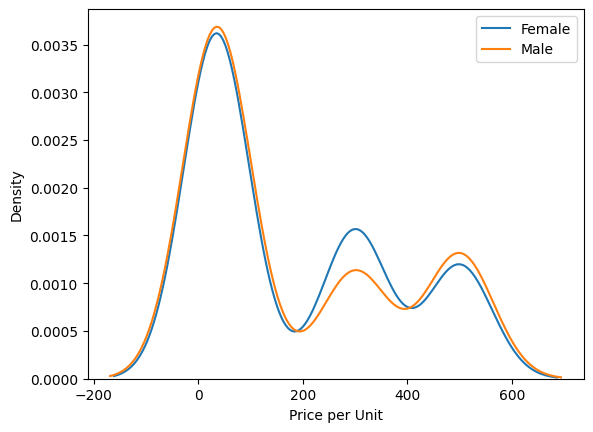

In [ ]:
for category in x_train['Gender_imputed'].unique():
    sns.distplot(x_train.loc[x_train['Gender_imputed']==category,'Price per Unit'],label=category,hist=False)
plt.legend()
plt.show()

Automatically select value for imputation:
We select the beast method for imputation of missing values out of different imputation methods

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
df=pd.read_excel('/content/Sales Dataset.csv.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,Male,34.0,Beauty,3.0,50.0,150
1,1,Female,26.0,Clothing,2.0,500.0,1000
2,2,Male,50.0,Electronics,1.0,30.0,30
3,3,Male,37.0,NaN,1.0,500.0,500
4,4,Male,30.0,NaN,2.0,50.0,100


In [ ]:
df.isnull().mean()

,0
Unnamed: 0,0.000
Gender,0.269
Age,0.051
Product Category,0.235
Quantity,0.125
Price per Unit,0.153
Total Amount,0.000


In [ ]:
x=df.drop(columns=['Total Amount'])
y=df['Total Amount']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
numerical=['Age','Quantity','Price per Unit']
Numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
categorical=['Gender','Product Category']
Categorical_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ]
)


In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('num',Numerical_transformer,numerical),
    ('cat',Categorical_transformer,categorical)
])


In [ ]:
clf=Pipeline(steps=[(
    'preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 3 (<ipython-input-55-3793202963>, line 6)

In [ ]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category'])])),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


param_grid={
    'preprocessor__num__imputer__strategy':['mean','median'],
    'preprocessor__cat__imputer__strategy':['most_frequent','constant'],
}

grid_search=GridSearchCV(clf,param_grid,cv=10)
grid_search.fit(x_train,y_train)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1231, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Example estimator
clf = LinearRegression()

# Parameter grid for GridSearchCV
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
}

# Impute missing values in y_train
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(x_train, y_train_imputed)


ValueError: Invalid parameter 'preprocessor' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example: define numerical and categorical columns
numerical = ['Age', 'Quantity', 'Price per Unit']
categorical = ['Gender', 'Product Category']

# Preprocessors for each type
Numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Numerical_transformer, numerical),
        ('cat', Categorical_transformer, categorical)
    ]
)

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Parameter grid for GridSearchCV (notice nested names!)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant']
}

# Impute missing values in y_train
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Fit the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train_imputed.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Quantity',
                                                                          'Price '
                                                                          'per '
                                                                          'Unit']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Product '
                                                                          'Category'])])),
                                       ('model', LinearRegression())]),
             param_grid={'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [ ]:
print('Best params:')
print(grid_search.best_params_)

Best params:
{'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.474


In [ ]:
import pandas as pd

cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df = cv_results_df.sort_values('mean_test_score',ascending=False)

print(cv_results_df[['param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']])

  param_preprocessor__cat__imputer__strategy  \
0                              most_frequent   
2                                   constant   
1                              most_frequent   
3                                   constant   

  param_preprocessor__num__imputer__strategy  mean_test_score  
0                                       mean         0.473962  
2                                       mean         0.469555  
1                                     median         0.455888  
3                                     median         0.452658  
